# GAMBITT Performance in Correctly Specified and Misspecified Settings in 1D Linear Environment

In [23]:
import numpy as np
import pandas as pd
import plotnine as gg
import re
import sys
import os
import yaml

import glob 
import pickle


In [1]:
from utils import *

/home/marcbr/miniconda3/envs/nats/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# 1-D Correctly Specified Setting

In [2]:
save_folder = '../results/plots/main_body/1d_experiment_optimism'

In [3]:
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
t=1000

In [5]:
results = load_simulation_results('../data/results/1d_experiment_linear_sd_0_2025-10-14', env="linear",  sds = ["sd_0"])

In [6]:
results = results.loc[results.agent_type != "ens-poGAMBITTS"].copy()

In [7]:
results['dims_used'] = results['dims_used'].fillna(results['agent_type'])

In [8]:
res_correct = results.loc[(results.dims_used.isin(['StdTS', "StdTS:Contextual", 'optimism']) )]

In [39]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=res_correct, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index()  

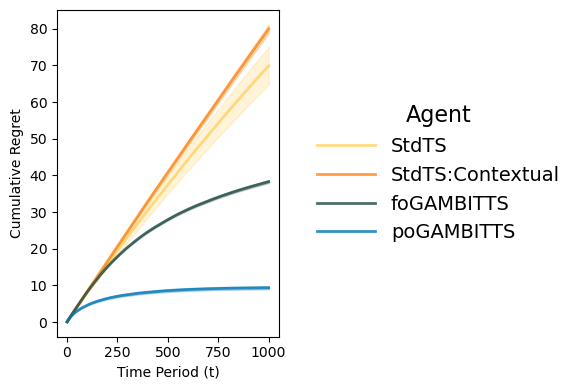

In [40]:
p = ( make_regret_plot_matplotlib(df = sim_cr, 
fill = "agent_type", 
title = ""))
with open(os.path.join(save_folder, '1d_correct_model.pckl'), "wb") as f:
    pickle.dump(p, f)

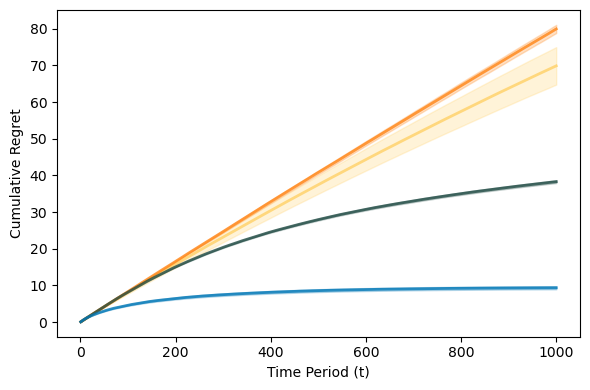

In [41]:
p = ( make_regret_plot_matplotlib(df = sim_cr, 
fill = "agent_type", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, '1d_correct_model_no_legebd.pckl'), "wb") as f:
    pickle.dump(p, f)

In [12]:
print(sim_cr[lambda x: x.t == t][['agent_type', 'mean', 'ci_lb', 'ci_ub']].to_markdown())

|       | agent_type         |    mean |   ci_lb |   ci_ub |
|------:|:-------------------|--------:|--------:|--------:|
|   999 | Std TS             | 115.986 | 108.634 | 123.337 |
| 10999 | Std TS: Contextual | 102.392 |  95.554 | 109.229 |


In [11]:

t=10000
print(
    sim_cr[lambda x: x.t == t][['agent_type', 'mean', 'ci_lb', 'ci_ub']]
    .assign(
        value=lambda x: x['mean'].apply(lambda val: f"{val:.1f}") + 
                        ' (' + x['ci_lb'].apply(lambda val: f"{val:.1f}") + 
                        ', ' + x['ci_ub'].apply(lambda val: f"{val:.1f}") + ')'
    )
    [['agent_type', 'value']]
    .to_markdown(index=False)
)

| agent_type         | value                   |
|:-------------------|:------------------------|
| Std TS             | 1159.4 (1129.0, 1189.9) |
| Std TS: Contextual | 1106.9 (1068.5, 1145.4) |
| foGAMBITTS         | 1033.5 (964.1, 1102.9)  |
| poGAMBITTS         | 745.0 (665.7, 824.3)    |


## Linear 1-D misspecification

In [43]:
save_folder = '../results/plots/main_body/1d_experiment_linear_sd_0'

In [44]:
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [45]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=results, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index() 

In [11]:
print(sim_cr[lambda x: x.t == 1000][['agent_type', 'dims_used', 't', 'mean',  'se', 'ci_lb', 'ci_ub']].to_markdown())

|       | agent_type         | dims_used          |    t |      mean |       se |     ci_lb |     ci_ub |
|------:|:-------------------|:-------------------|-----:|----------:|---------:|----------:|----------:|
|   999 | Std TS             | Std TS             | 1000 |  71.3423  | 2.59737  |  66.2515  |  76.4332  |
|  1999 | Std TS: Contextual | Std TS: Contextual | 1000 |  76.3598  | 0.964012 |  74.4703  |  78.2493  |
|  2999 | foGAMBITTS         | clarity            | 1000 |  82.6387  | 0.263369 |  82.1225  |  83.1549  |
|  3999 | foGAMBITTS         | encouragement      | 1000 |  45.2561  | 0.292426 |  44.683   |  45.8293  |
|  4999 | foGAMBITTS         | formality          | 1000 |  57.37    | 0.50063  |  56.3888  |  58.3512  |
|  5999 | foGAMBITTS         | optimism           | 1000 |  34.1539  | 0.190268 |  33.781   |  34.5268  |
|  6999 | foGAMBITTS         | severity           | 1000 |  35.5111  | 0.170099 |  35.1777  |  35.8445  |
|  7999 | poGAMBITTS         | clarity        

### poGAMBITTS Linear 1-D misspecification

In [46]:
t=1000

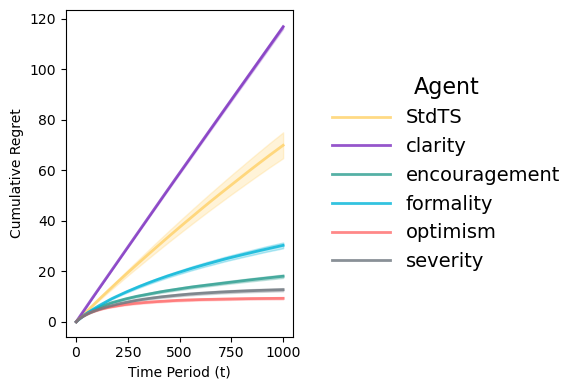

In [47]:
agents=['poGAMBITTS','StdTS']

p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = ""))
with open(os.path.join(save_folder, 'ponats_1d_linear.pckl'), "wb") as f:
    pickle.dump(p, f)

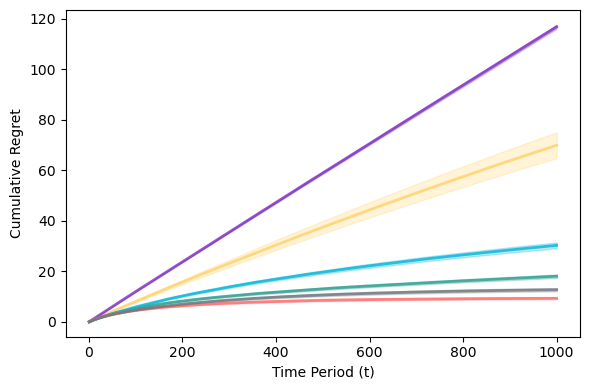

In [48]:
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, 'ponats_1d_linear_no_legend.pckl'), "wb") as f:
    pickle.dump(p, f)

### foGAMBITTS Linear 1-D misspecification

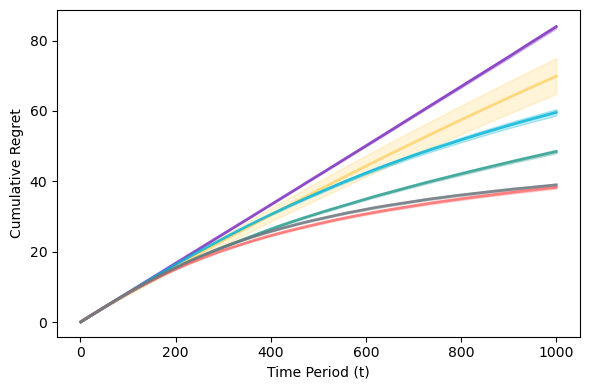

In [49]:
agents=['foGAMBITTS','StdTS']
p = (make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, 'fonats_1d_linear.pckl'), "wb") as f:
    pickle.dump(p, f)

# 1-D misspecification with prompt indicators to hedge 

In [9]:
save_folder = '../results/plots/supplement/1d_experiment_hedging'

In [10]:
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

#

In [11]:
results_h = load_simulation_results('../data/results/1d_experiment_linear_prompts_sd_0_2025-10-14', env="linear",  sds = ["sd_0"])

In [12]:
results_h['hedged'] = "With Prompts"

In [13]:
results['hedged'] = "Without Prompts"
results.loc[results['agent_type'].eq('StdTS'), 'hedged'] = "StdTS"

In [14]:
results_h = pd.concat([results, results_h], ignore_index=True)

In [15]:
results_h[['agent_type']].value_counts()

agent_type      
poGAMBITTS          2500000
foGAMBITTS          2500000
StdTS:Contextual     250000
StdTS                250000
Name: count, dtype: int64

In [16]:
results_h = results_h.loc[results_h.agent_type!="StdTS:Contextual"].copy()

In [17]:
agg_cols = ['agent_type', "dims_used", "hedged", "t"]
agg_res= get_agg_results(df=results_h, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index() 

In [20]:
sim_cr.hedged.value_counts()

hedged
With Prompts       10000
Without Prompts    10000
StdTS               1000
Name: count, dtype: int64

In [19]:
from matplotlib.lines import Line2D

def make_regret_plot_matplotlib(df, title, fill='dims_used', metric="Cumulative Regret",
                                bars=True, hedged_col='hedged', include_legend=True):
    """
    Simple Matplotlib regret plot:
      • color by `fill` (e.g., dims_used)
      • linestyle by `hedged`:
            'With Prompts'    → solid
            'Without Prompts' → dotted
            'StdTS'           → dashdot
      • three legend blocks, each with white background
    """

    AGENT_COLORS = {
        'poGAMBITTS': '#0077b6',
        'foGAMBITTS': '#1f4a43',
        'ens-poGAMBITTS': '#8B0000',
        'StdTS': '#ffd166',
        'StdTS:Contextual': '#ff8515',
        "Clarity": "#7b2cbf",
        "Formality": "#00b4d8",
        "Encouragement": "#2a9d8f",
        "Optimism": '#ff6b6b',
        "Severity": "#6c757d",
        "Encouragement,clarity": "#9d4edd",
        "15 samples": "#e6194B",
        "50 samples": "#3cb44b",
        "100 samples": "#2e86c1",
        "500 samples": "#f58231",
        "950 samples": "#911eb4",
        "Complete": "#46f0f0"
    }

    LS = {"With Prompts": '-', "Without Prompts": ':', "StdTS": '-.'}

    # Use constrained_layout so outside legends are visible
    fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

    # Collect handles per hedged state
    handles = {"With Prompts": [], "Without Prompts": [], "StdTS": []}

    # Plot each (fill, hedged) combination
    for (agent, hedge_status), group in df.groupby([fill, hedged_col], dropna=False):
        if pd.isna(hedge_status):
            continue
        hedge_status = str(hedge_status)
        color = AGENT_COLORS.get(agent, 'gray')
        ls = LS.get(hedge_status, '-')

        group = group.sort_values('t')
        t = group['t'].to_numpy()
        mean = group['mean'].to_numpy()
        lb = group['ci_lb'].to_numpy()
        ub = group['ci_ub'].to_numpy()

        ax.plot(t, mean, color=color, lw=2, alpha=0.9, linestyle=ls, label=agent)
        if bars:
            ax.fill_between(t, lb, ub, color=color, alpha=0.25)

        proxy = Line2D([0], [0], color=color, lw=2, linestyle=ls, label=agent)
        if agent not in [h.get_label() for h in handles[hedge_status]]:
            handles[hedge_status].append(proxy)

    # Axis labels and title
    ax.set_xlabel("Time Period (t)")
    ax.set_ylabel(metric)
    ax.set_title(title or "", loc='center')

    # Debug: see how many handles you have
    print({k: len(v) for k, v in handles.items()})

    # Three separate legends stacked to the right
    if include_legend:
        x_anchor = 1.02
        y_start = 0.95
        dy = 0.24

        if handles["With Prompts"]:
            leg1 = ax.legend(
                handles=handles["With Prompts"],
                title="With Prompts",
                loc='upper left',
                bbox_to_anchor=(x_anchor, y_start),
                bbox_transform=ax.transAxes,
                frameon=True,
                facecolor="white"
            )
            ax.add_artist(leg1)
        if handles["Without Prompts"]:
            leg2 = ax.legend(
                handles=handles["Without Prompts"],
                title="Without Prompts",
                loc='upper left',
                bbox_to_anchor=(x_anchor, y_start - 1.5*dy),
                bbox_transform=ax.transAxes,
                frameon=True,
                facecolor="white"
            )
            ax.add_artist(leg2)
        if handles["StdTS"]:
            leg3 = ax.legend(
                handles=handles["StdTS"],
                title="StdTS",
                loc='upper left',
                bbox_to_anchor=(x_anchor, y_start - 3 * dy),
                bbox_transform=ax.transAxes,
                frameon=True,
                facecolor="white",
            )
            ax.add_artist(leg3)



    return fig

In [26]:
from matplotlib.lines import Line2D

def make_regret_plot_matplotlib(df, title, fill='dims_used', metric="Cumulative Regret",
                                bars=True, hedged_col='hedged', include_legend=True):
    """
    Simple Matplotlib regret plot:
      • color by `fill` (e.g., dims_used)
      • linestyle by `hedged`:
            'With Prompts'    → solid
            'Without Prompts' → dotted
            'StdTS'           → solid   (per request)
      • three legend blocks, each with white background
      • NO error bands for 'With Prompts'
    """

    AGENT_COLORS = {
        'poGAMBITTS': '#0077b6',
        'foGAMBITTS': '#1f4a43',
        'ens-poGAMBITTS': '#8B0000',
        'StdTS': '#ffd166',
        'StdTS:Contextual': '#ff8515',
        "Clarity": "#7b2cbf",
        "Formality": "#00b4d8",
        "Encouragement": "#2a9d8f",
        "Optimism": '#ff6b6b',
        "Severity": "#6c757d",
        "Encouragement,clarity": "#9d4edd",
        "15 samples": "#e6194B",
        "50 samples" : "#3cb44b",
        "100 samples" : "#2e86c1",
        "500 samples": "#f58231",
        "950 samples" : "#911eb4",
        "Complete": "#46f0f0"
    }

    # StdTS now solid, like With Prompts
    LS = {"With Prompts": '-', "Without Prompts": ':', "StdTS": '-'}

    fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

    handles = {"With Prompts": [], "Without Prompts": [], "StdTS": []}

    for (agent, hedge_status), group in df.groupby([fill, hedged_col], dropna=False):
        if pd.isna(hedge_status):
            continue
        hedge_status = str(hedge_status)
        color = AGENT_COLORS.get(agent, 'gray')
        ls = LS.get(hedge_status, '-')

        group = group.sort_values('t')
        t  = group['t'].to_numpy()
        mu = group['mean'].to_numpy()
        lb = group['ci_lb'].to_numpy()
        ub = group['ci_ub'].to_numpy()

        ax.plot(t, mu, color=color, lw=2, alpha=0.9, linestyle=ls, label=agent)

        # Draw error bands unless it's "With Prompts"
        if bars and hedge_status != "Without Prompts":
            ax.fill_between(t, lb, ub, color=color, alpha=0.25)

        proxy = Line2D([0], [0], color=color, lw=2, linestyle=ls, label=agent)
        if agent not in [h.get_label() for h in handles[hedge_status]]:
            handles[hedge_status].append(proxy)

    ax.set_xlabel("Time Period (t)")
    ax.set_ylabel(metric)
    ax.set_title(title or "", loc='center')

    if include_legend:
        x_anchor = 1.02
        y_start = 0.95
        dy = 0.24

        if handles["With Prompts"]:
            leg1 = ax.legend(
                handles=handles["With Prompts"],
                title="With Prompts",
                loc='upper left',
                bbox_to_anchor=(x_anchor, y_start),
                bbox_transform=ax.transAxes,
                frameon=True,
                facecolor="white"
            )
            ax.add_artist(leg1)
        if handles["Without Prompts"]:
            leg2 = ax.legend(
                handles=handles["Without Prompts"],
                title="Without Prompts",
                loc='upper left',
                bbox_to_anchor=(x_anchor, y_start - 1.5*dy),
                bbox_transform=ax.transAxes,
                frameon=True,
                facecolor="white"
            )
            ax.add_artist(leg2)
        if handles["StdTS"]:
            leg3 = ax.legend(
                handles=handles["StdTS"],
                title="StdTS",
                loc='upper left',
                bbox_to_anchor=(x_anchor, y_start - 3*dy),
                bbox_transform=ax.transAxes,
                frameon=True,
                facecolor="white"
            )
            ax.add_artist(leg3)

    return fig

In [18]:
def make_regret_plot_matplotlib(
    df, title, fill='dims_used', metric="Cumulative Regret",
    bars=True, hedged_col='hedged', include_legend=True
):
    """
    Matplotlib regret plot:
      • color by `fill` (e.g., dims_used)
      • linestyle by `hedged`:
            'With Prompts'    → solid
            'Without Prompts' → dotted
            'StdTS'           → solid (baseline)
      • single combined legend showing both prompt styles per dimension
      • no error bands for 'With Prompts'
    """

    AGENT_COLORS = {
        'poGAMBITTS': '#0077b6',
        'foGAMBITTS': '#1f4a43',
        'ens-poGAMBITTS': '#8B0000',
        'StdTS': '#ffd166',
        'StdTS:Contextual': '#ff8515',
        "Clarity": "#7b2cbf",
        "Formality": "#00b4d8",
        "Encouragement": "#2a9d8f",
        "Optimism": '#ff6b6b',
        "Severity": "#6c757d",
        "Encouragement,clarity": "#9d4edd",
        "15 samples": "#e6194B",
        "50 samples": "#3cb44b",
        "100 samples": "#2e86c1",
        "500 samples": "#f58231",
        "950 samples": "#911eb4",
        "Complete": "#46f0f0"
    }

    # Linestyles
    LS = {"With Prompts": '-', "Without Prompts": ':', "StdTS": '-'}

    fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

    # Keep track of which dims have been drawn
    legend_handles = {}

    for (agent, hedge_status), group in df.groupby([fill, hedged_col], dropna=False):
        if pd.isna(hedge_status):
            continue
        hedge_status = str(hedge_status)
        color = AGENT_COLORS.get(agent, 'gray')
        ls = LS.get(hedge_status, '-')

        group = group.sort_values('t')
        t = group['t'].to_numpy()
        mu = group['mean'].to_numpy()
        lb = group['ci_lb'].to_numpy()
        ub = group['ci_ub'].to_numpy()

        ax.plot(t, mu, color=color, lw=2, alpha=0.9, linestyle=ls, label=f"{agent} ({hedge_status})")

        # Only add error bands for non-With Prompts
        if bars and hedge_status != "Without Prompts":
            ax.fill_between(t, lb, ub, color=color, alpha=0.25)

        # store one solid and one dotted handle per dimension for legend
        if agent not in legend_handles:
            legend_handles[agent] = {}
        legend_handles[agent][hedge_status] = Line2D(
            [0], [0], color=color, lw=2, linestyle=ls
        )

    # Axis labels
    ax.set_xlabel("Time Period (t)")
    ax.set_ylabel(metric)
    ax.set_title(title or "", loc='center')

    # === Combined Legend ===
    if include_legend:
        # build combined legend handles in order: one row per dimension
        handles = []
        labels = []
        for agent, style_dict in legend_handles.items():
            # Only add one of each style if it exists
            for status in ["With Prompts", "Without Prompts"]:
                if status in style_dict:
                    handles.append(style_dict[status])
                    labels.append(agent if status == "With Prompts" else "")
        leg = ax.legend(
            handles, labels,
            title="Dimensions",
            loc='center left',
            bbox_to_anchor=(1.02, 0.5),
            frameon=True,
            facecolor="white",
            fontsize=12,
            title_fontsize=13,
            ncol=1,
            borderaxespad=1.0
        )
        ax.add_artist(leg)

        # Add StdTS separately (keeps clear baseline block)
        stdts_handle = Line2D([0], [0], color=AGENT_COLORS["StdTS"], lw=2, linestyle='-')
        leg2 = ax.legend(
            [stdts_handle], ["StdTS"],
            loc='upper left',
            bbox_to_anchor=(1.02, 0.95),
            frameon=True,
            facecolor="white",
            fontsize=12,
            title_fontsize=13
        )
        ax.add_artist(leg2)

    style_handles = [
            Line2D([0], [0], color='black', lw=2, linestyle='-', label='With Prompts'),
            Line2D([0], [0], color='black', lw=2, linestyle=':', label='Without Prompts')
        ]
        leg3 = ax.legend(
            style_handles, ['With Prompts', 'Without Prompts'],
            loc='upper left',
            bbox_to_anchor=(1.02, 0.80),
            frameon=True,
            facecolor="white",
            fontsize=12
        )
        ax.add_artist(leg3)

    return fig

IndentationError: unexpected indent (932806137.py, line 117)

In [20]:

def make_regret_plot_matplotlib(
    df, title, fill='dims_used', metric="Cumulative Regret",
    bars=True, hedged_col='hedged', include_legend=True
):
    """
    Matplotlib regret plot:
      • color by `fill` (e.g., dims_used)
      • linestyle by `hedged`:
            'With Prompts'    → solid
            'Without Prompts' → dotted
            'StdTS'           → solid (baseline)
      • single combined legend showing both prompt styles per dimension
      • one additional legend clarifying line style meaning
    """

    AGENT_COLORS = {
        'poGAMBITTS': '#0077b6',
        'foGAMBITTS': '#1f4a43',
        'ens-poGAMBITTS': '#8B0000',
        'StdTS': '#ffd166',
        'StdTS:Contextual': '#ff8515',
        "Clarity": "#7b2cbf",
        "Formality": "#00b4d8",
        "Encouragement": "#2a9d8f",
        "Optimism": '#ff6b6b',
        "Severity": "#6c757d",
        "Encouragement,clarity": "#9d4edd",
        "15 samples": "#e6194B",
        "50 samples": "#3cb44b",
        "100 samples": "#2e86c1",
        "500 samples": "#f58231",
        "950 samples": "#911eb4",
        "Complete": "#46f0f0"
    }

    LS = {"With Prompts": '-', "Without Prompts": ':', "StdTS": '-'}

    fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

    legend_handles = {}

    for (agent, hedge_status), group in df.groupby([fill, hedged_col], dropna=False):
        if pd.isna(hedge_status):
            continue
        hedge_status = str(hedge_status)
        color = AGENT_COLORS.get(agent, 'gray')
        ls = LS.get(hedge_status, '-')

        group = group.sort_values('t')
        t = group['t'].to_numpy()
        mu = group['mean'].to_numpy()
        lb = group['ci_lb'].to_numpy()
        ub = group['ci_ub'].to_numpy()

        ax.plot(t, mu, color=color, lw=2, alpha=0.9, linestyle=ls, label=f"{agent} ({hedge_status})")

        # Only add error bands for Without Prompts
        if bars and hedge_status != "Without Prompts":
            ax.fill_between(t, lb, ub, color=color, alpha=0.25)

        # store one handle per dimension
        if agent not in legend_handles:
            legend_handles[agent] = {}
        legend_handles[agent][hedge_status] = Line2D([0], [0], color=color, lw=2, linestyle=ls)

    ax.set_xlabel("Time Period (t)")
    ax.set_ylabel(metric)
    ax.set_title(title or "", loc='center')

    if include_legend:
        # --- main dimension legend ---
        handles, labels = [], []
        for agent, style_dict in legend_handles.items():
            if "With Prompts" in style_dict:
                handles.append(style_dict["With Prompts"])
                labels.append(agent)
            elif "Without Prompts" in style_dict:
                handles.append(style_dict["Without Prompts"])
                labels.append(agent)

        leg1 = ax.legend(
            handles, labels,
            title="Dimensions",
            loc='center left',
            bbox_to_anchor=(1.02, 0.5),
            frameon=True,
            facecolor="white",
            fontsize=12,
            title_fontsize=13,
        )
        ax.add_artist(leg1)

        # --- StdTS legend ---
        stdts_handle = Line2D([0], [0], color=AGENT_COLORS["StdTS"], lw=2, linestyle='-')
        leg2 = ax.legend(
            [stdts_handle], ["StdTS (Baseline)"],
            loc='upper left',
            bbox_to_anchor=(1.02, 0.95),
            frameon=True,
            facecolor="white",
            fontsize=12,
            title_fontsize=13
        )
        ax.add_artist(leg2)

        # --- new style key legend ---
        style_handles = [
            Line2D([0], [0], color='black', lw=2, linestyle='-', label='With Prompts'),
            Line2D([0], [0], color='black', lw=2, linestyle=':', label='Without Prompts')
        ]
        leg3 = ax.legend(
            style_handles, ['With Prompts', 'Without Prompts'],
            title="",
            loc='upper left',
            bbox_to_anchor=(1.02, 0.33),
            frameon=True,
            facecolor="white",
            fontsize=12,
            title_fontsize=13
        )
        ax.add_artist(leg3)

    return fig

In [21]:
sim_cr.loc[sim_cr.hedged != "StdTS", "dims_used"] = sim_cr.loc[sim_cr.hedged != "StdTS", "dims_used"].str.capitalize()

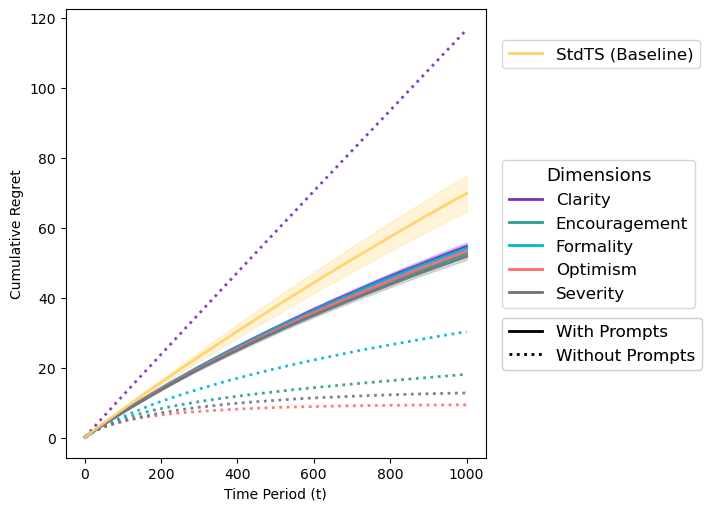

In [58]:
agents=['poGAMBITTS','StdTS']

p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
hedged_col='hedged',
title = ""))
with open(os.path.join(save_folder, 'ponats_1d_linear_hedge.pckl'), "wb") as f:
    pickle.dump(p, f)

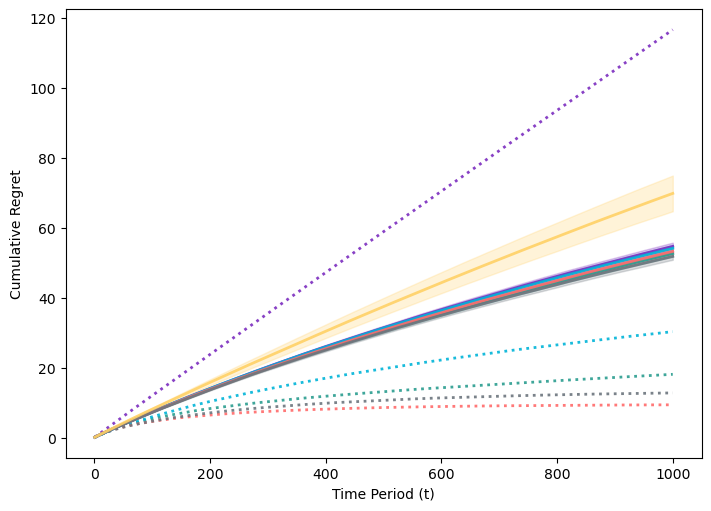

In [39]:
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, 'ponats_1d_linear_hedge_no_legend.pckl'), "wb") as f:
    pickle.dump(p, f)

### foGAMBITTS Linear 1-D misspecification with hedging

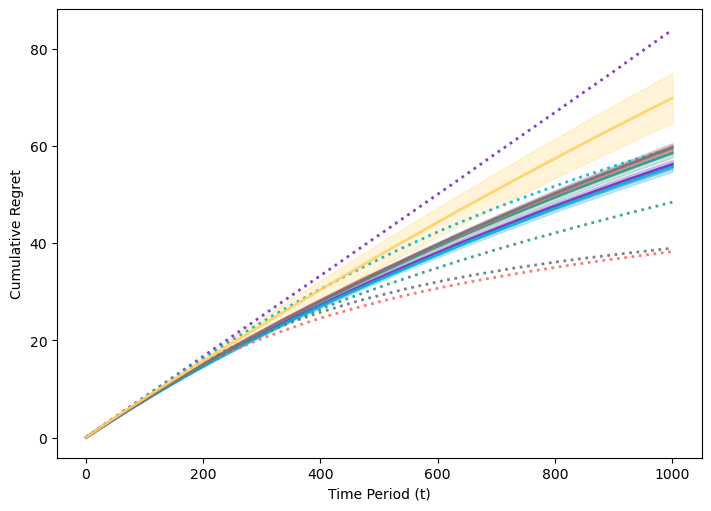

In [24]:
agents=['foGAMBITTS','StdTS']
p = (make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, 'fonats_1d_linear_hedge.pckl'), "wb") as f:
    pickle.dump(p, f)